In [135]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import prophet
import sklearn
import matplotlib
from prophet.diagnostics import cross_validation
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly

In [136]:
print("Prophet version:", prophet.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)

Prophet version: 1.1.5
Scikit-learn version: 1.5.2
Matplotlib version: 3.9.2


## Column Description

https://www.kaggle.com/datasets/maharshipandya/-cryptocurrency-historical-prices-dataset

**open:** Opening price on that particular date (UTC time)

**high:** Highest price hit on that particular date (UTC time)

**low:** Lowest price hit on that particular date (UTC time)

**close:** Closing price on that particular date (UTC time). The prices are represented in USD or $

**volume:** Quantity of asset bought or sold, displayed in base currency

**marketCap:** The total value of all the coins that have been mined. It's calculated by multiplying the number of coins in circulation by the current market price of a single coin

**timestamp:** UTC timestamp of the day considered

**crypto_name:** Name of the cryptocurrency

**date:** timestamp converted to date

In [137]:

df = pd.read_csv('crypto_dataset.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


In [138]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         72946 non-null  float64
 1   high         72946 non-null  float64
 2   low          72946 non-null  float64
 3   close        72946 non-null  float64
 4   volume       72946 non-null  float64
 5   marketCap    72946 non-null  float64
 6   timestamp    72946 non-null  object 
 7   crypto_name  72946 non-null  object 
 8   date         72946 non-null  object 
dtypes: float64(6), object(3)
memory usage: 5.0+ MB


In [140]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   open         72946 non-null  float64       
 1   high         72946 non-null  float64       
 2   low          72946 non-null  float64       
 3   close        72946 non-null  float64       
 4   volume       72946 non-null  float64       
 5   marketCap    72946 non-null  float64       
 6   timestamp    72946 non-null  object        
 7   crypto_name  72946 non-null  object        
 8   date         72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 5.0+ MB


In [141]:
df = df.set_index('date',drop=True)
df

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin
2013-05-05,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin
2013-05-06,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin
2013-05-06,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin
2013-05-07,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin
...,...,...,...,...,...,...,...,...
2022-10-23,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain
2022-10-23,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow
2022-10-23,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin


In [142]:
df['crypto_name'].nunique()

56

So we have 56 different cryptos that we have to train

and there is two target variable low,high so have to train for both

In [143]:
# Calculate the percentage and round the values
crypto_percentage = (df['crypto_name'].value_counts() / len(df)) * 100
crypto_percentage_rounded = crypto_percentage.round(2)

# Create a new DataFrame
crypto_df = pd.DataFrame({'Crypto Name': crypto_percentage_rounded.index, 'Percentage': crypto_percentage_rounded.values})

# Display the DataFrame
crypto_df


,Crypto Name,Percentage
0,Bitcoin,4.45
1,Litecoin,4.45
2,XRP,4.33
3,Dogecoin,4.15
4,Monero,3.93
5,Stellar,3.83
6,Tether,3.54
7,Ethereum,3.32
8,Ethereum Classic,2.84
9,Basic Attention Token,2.41


In [144]:
crypto_df = crypto_df[crypto_df['Percentage']>3]

In [145]:
crypto_df

,Crypto Name,Percentage
0,Bitcoin,4.45
1,Litecoin,4.45
2,XRP,4.33
3,Dogecoin,4.15
4,Monero,3.93
5,Stellar,3.83
6,Tether,3.54
7,Ethereum,3.32


In [146]:
# df.groupby(by='crypto_name').count().to_csv('counts.csv')

In [147]:
# df['crypto_name'].value_counts()/(len(df))*100

In [148]:
crypto = "Bitcoin"
train_df = df[df['crypto_name']== crypto]

<Axes: xlabel='date'>

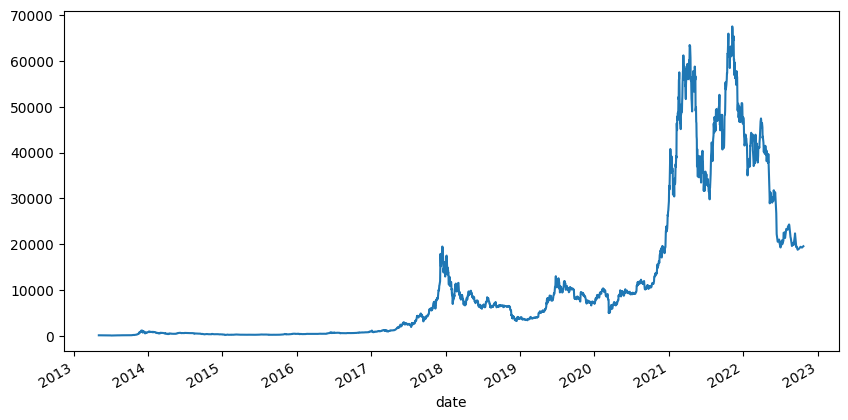

In [149]:
train_df["close"].plot(figsize=(10,5))

In [150]:
date = '2017-09-25'

<Axes: xlabel='date'>

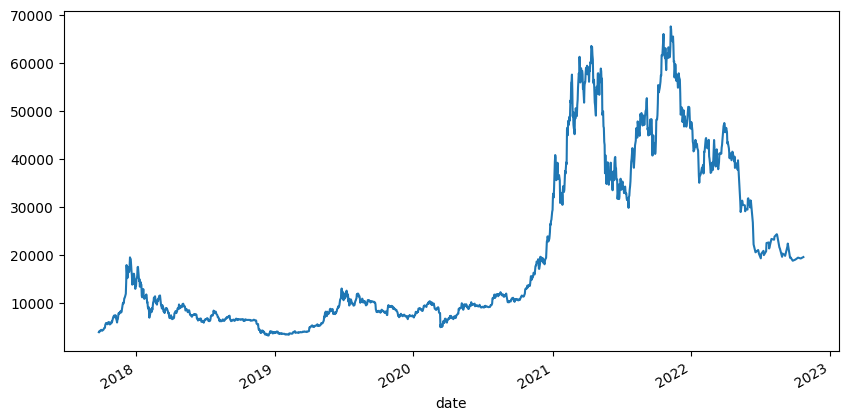

In [151]:
train_df.loc[date:,"close"].plot(figsize=(10,5))

for using limit make sure the index type is in date. so first convert date to date_time then make it a index

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply StandardScaler on the 'close' column
train_df['close_scaled'] = scaler.fit_transform(train_df[['close']])


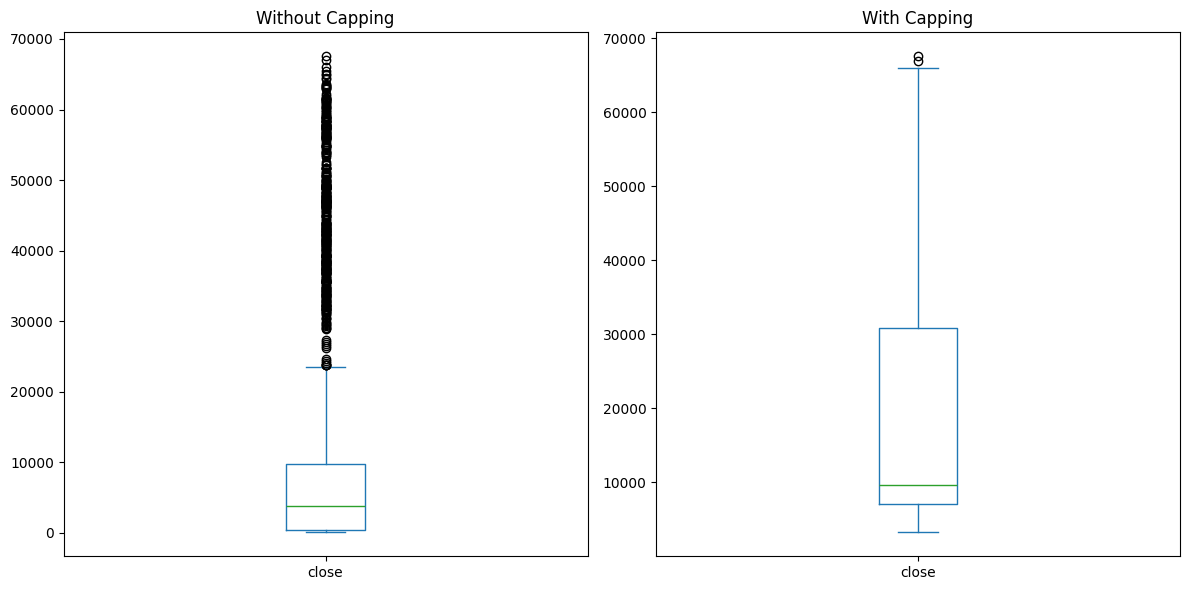

In [153]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 'without capping' on the first subplot
train_df['close'].plot(kind='box', ax=axes[0], title='Without Capping')

# Plot 'with capping' on the second subplot (replace `data:` with your actual filter)
train_df.loc[date:, "close"].plot(kind='box', ax=axes[1], title='With Capping')

# Display the plots side by side
plt.tight_layout()
plt.show()


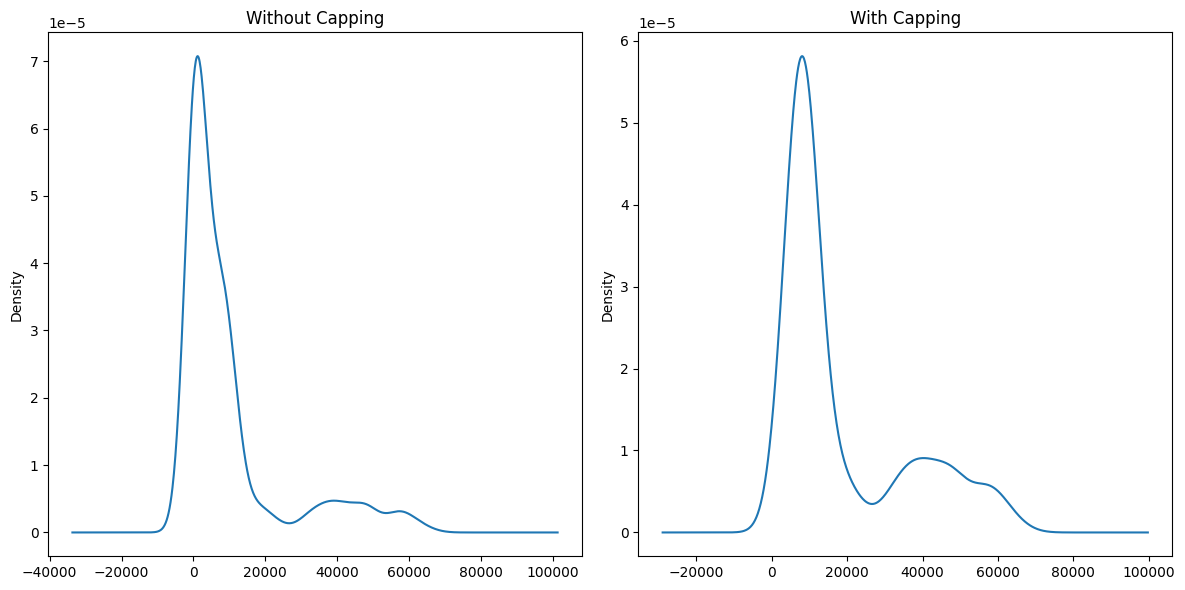

In [154]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 'without capping' on the first subplot
train_df['close'].plot(kind='kde', ax=axes[0], title='Without Capping')

# Plot 'with capping' on the second subplot (replace `data:` with your actual filter)
train_df.loc[date:, "close"].plot(kind='kde', ax=axes[1], title='With Capping')

# Display the plots side by side
plt.tight_layout()
plt.show()


In [155]:
train_df.loc[:,"close"].skew()

2.048389110121456

In [156]:
train_df.loc[date:, "close"].skew()

1.2448748279104855

In [129]:
# train_df = train_df.loc[date:, "close"].to_frame()
train_df

,close
date,
2017-09-25,3926.070068
2017-09-26,3892.350098
2017-09-27,4200.669922
2017-09-28,4174.729980
2017-09-29,4163.069824
...,...
2022-09-25,18802.097976
2022-10-02,19044.107272
2022-10-09,19446.426194


<Axes: >

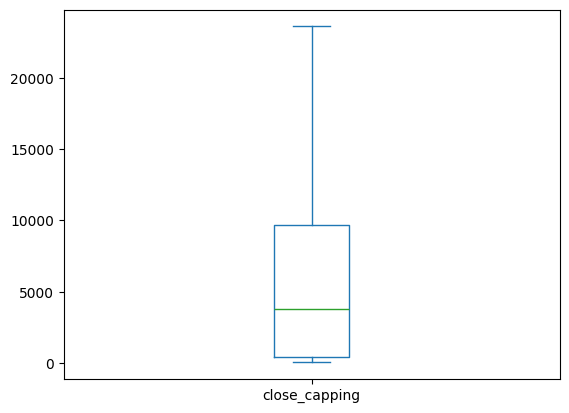

In [157]:

q1 = train_df['close'].quantile(0.25)
q3 = train_df['close'].quantile(0.75)
IQR = q3-q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

train_df['close_capping'] = np.where(train_df['close']<lower_bound,lower_bound,np.where(train_df['close']>upper_bound,upper_bound,train_df['close'] ))
train_df['close_capping'].plot(kind='box')

<Axes: ylabel='Density'>

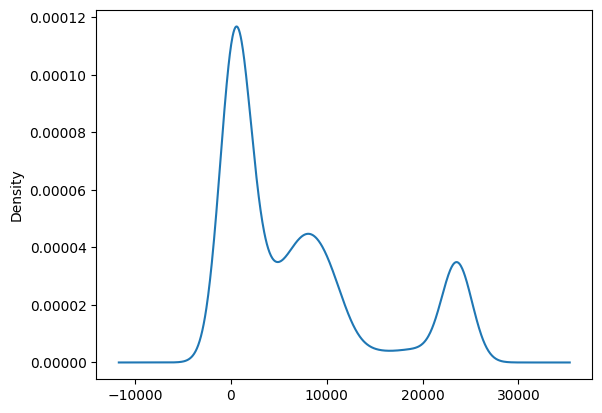

In [158]:
train_df['close_capping'].plot(kind='kde')

In [159]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = "yeo-johnson")
x_train = train_df['close_capping'].values
x_train = x_train.reshape(-1, 1)
New_transform_col = pt.fit_transform(x_train)
# pd.DataFrame( { ‘cols’:x_train.columns , ‘value of lambda’ : pt.lambdas_} )

1.143307946822177


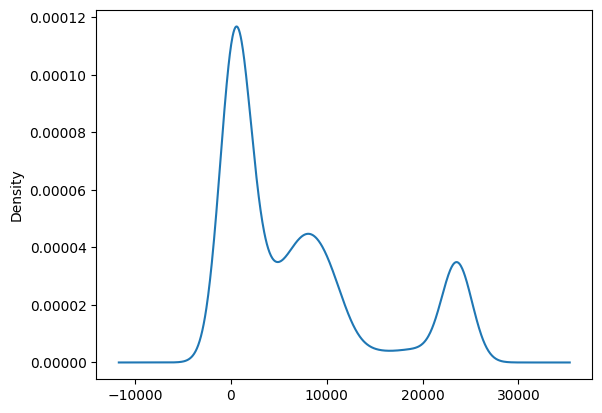

In [160]:
# train_df['close_yeo'] = New_transform_col
train_df['close_capping'].plot(kind='kde')
print(train_df['close_capping'].skew())

-0.15588385827680917


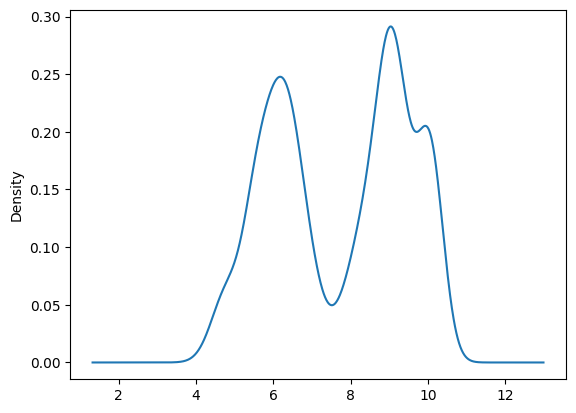

In [161]:
train_df['close_capping'].apply(np.log1p).plot(kind='kde')
print(train_df['close_capping'].apply(np.log1p).skew())

In [162]:
train_df['close_capping_log1p'] = train_df['close_capping'].apply(np.log1p)

<Axes: >

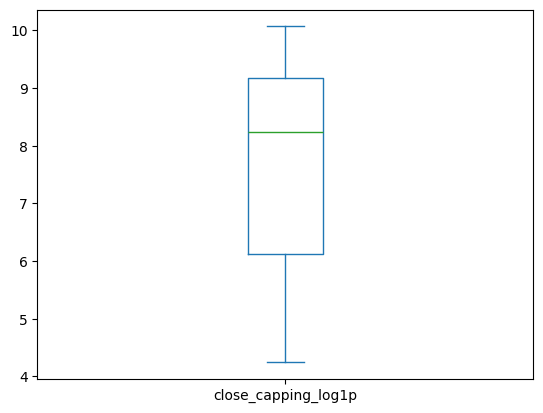

In [163]:
train_df['close_capping_log1p'].plot(kind='box')

In [164]:
# import plotly.express as px

# # Assuming train_df is your DataFrame with a datetime index
# # Ensure that the index is in datetime format, if not, convert it
# # train_df.index = pd.to_datetime(train_df.index)

# # Calculate the rolling mean
# train_df["close1"] = train_df["close"].rolling(30).mean()

# # Filter the DataFrame for the specified date range
# filtered_df = train_df.loc['2017-06-13':'2022-10-23', ["close", "close1"]]

# # Plot using plotly.express
# fig = px.line(filtered_df, x=filtered_df.index, y=["close", "close1"], labels={"index": "Date", "value": "closed price"})
# fig.update_layout(title="Market Cap and 30-day Rolling Average", xaxis_title="Date", yaxis_title="Market Cap")
# fig.show()

In [165]:
# train_df.isnull().sum()

In [166]:

train_df['close'] = train_df['close_capping_log1p']

In [167]:
# train_df['close'] = train_df['close_capping_log1p']

In [168]:
# from statsmodels.tsa.stattools import adfuller
# def check_stationary(data:pd.Series()):
#     results = adfuller(data)
#     p = results[1]
    
#     # The result tuple contains the following elements
#     print(f'ADF Statistic: {results[0]}')
#     print(f'P-value: {results[1]}')
    
#     if results[1] < 0.05:
#         print(f"h0 rejected and h1 accepted: The data is stationary")
#     else:
#         print(f"h0 accepted and h1 rejected: The data is non-stationary ")
    
#     print(f'Lags Used ( The number of the lags used in the test): {results[2]}')
#     print(f'Number of Observations: {results[3]}')
#     print(f'Critical values for the test statistic at different significance levels: {results[4]}')

In [169]:
# check_stationary(train_df['close'].dropna())

In [170]:
# result = adfuller(train_df['close'])
# #shifting
# train_df['close1'] = train_df['close'] - train_df['close'].shift(1)
# #since we are shifting so ist value will be nan so have to drop that
# train_df['close1'].fillna(train_df['close1'].median(),inplace=True)
# check_stationary(train_df['close1'])

In [171]:
train_df.isnull().sum()

open                   0
high                   0
low                    0
close                  0
volume                 0
marketCap              0
timestamp              0
crypto_name            0
close_scaled           0
close_capping          0
close_capping_log1p    0
dtype: int64

In [172]:
from prophet import Prophet
import numpy as np

In [173]:
train_df

,open,high,low,close,volume,marketCap,timestamp,crypto_name,close_scaled,close_capping,close_capping_log1p
date,,,,,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,4.761404,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,-0.636056,115.910004,4.761404
2013-05-06,115.980003,124.663002,106.639999,4.730039,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,-0.636296,112.300003,4.730039
2013-05-07,112.250000,113.444000,97.699997,4.722953,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,-0.636349,111.500000,4.722953
2013-05-08,109.599998,115.779999,109.599998,4.741151,0.000000e+00,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin,-0.636212,113.566002,4.741151
2013-05-09,113.199997,113.459999,109.260002,4.733299,0.000000e+00,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin,-0.636271,112.669998,4.733299
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25,18936.311515,19134.733194,18696.468304,9.841777,2.335997e+10,3.602593e+11,2022-09-25T23:59:59.999Z,Bitcoin,0.604769,18802.097976,9.841777
2022-10-02,19311.848708,19370.309281,18970.620583,9.854566,2.076596e+10,3.650248e+11,2022-10-02T23:59:59.999Z,Bitcoin,0.620840,19044.107272,9.854566
2022-10-09,19417.479411,19542.538654,19349.258953,9.875470,1.683726e+10,3.728768e+11,2022-10-09T23:59:59.999Z,Bitcoin,0.647555,19446.426194,9.875470


In [174]:
train_df = train_df.reset_index()
train_df = train_df[["date","close"]]
train_df.columns = ["ds","y"]
train_df.isnull().sum()

ds    0
y     0
dtype: int64

In [175]:
# train_df['y'] = [np.log(i) for i in train_df['y']]
# train_df.head()

In [176]:
model = Prophet()
model.fit(train_df)

09:01:19 - cmdstanpy - INFO - Chain [1] start processing
09:01:20 - cmdstanpy - INFO - Chain [1] done processing


In [177]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [178]:
future_dates = model.make_future_dataframe(periods=360)

In [179]:
future_dates.tail()

,ds
3603,2023-10-14
3604,2023-10-15
3605,2023-10-16
3606,2023-10-17
3607,2023-10-18


In [180]:
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-05-05,4.732540,4.467589,4.875928,4.732540,4.732540,-0.070392,-0.070392,-0.070392,-0.012864,-0.012864,-0.012864,-0.057528,-0.057528,-0.057528,0.0,0.0,0.0,4.662149
1,2013-05-06,4.731671,4.465180,4.872801,4.731671,4.731671,-0.058461,-0.058461,-0.058461,-0.003469,-0.003469,-0.003469,-0.054993,-0.054993,-0.054993,0.0,0.0,0.0,4.673210
2,2013-05-07,4.730802,4.468271,4.879612,4.730802,4.730802,-0.049156,-0.049156,-0.049156,0.003179,0.003179,0.003179,-0.052334,-0.052334,-0.052334,0.0,0.0,0.0,4.681646
3,2013-05-08,4.729932,4.487403,4.877976,4.729932,4.729932,-0.047977,-0.047977,-0.047977,0.001592,0.001592,0.001592,-0.049569,-0.049569,-0.049569,0.0,0.0,0.0,4.681955
4,2013-05-09,4.729063,4.484534,4.885121,4.729063,4.729063,-0.042192,-0.042192,-0.042192,0.004525,0.004525,0.004525,-0.046717,-0.046717,-0.046717,0.0,0.0,0.0,4.686871


In [181]:

plot_plotly(model,prediction)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 5, 5, 0, 0),
                          datetime.datetime(2013, 5, 6, 0, 0),
                          datetime.datetime(2013, 5, 7, 0, 0), ...,
                          datetime.datetime(2022, 10, 9, 0, 0),
                          datetime.datetime(2022, 10, 16, 0, 0),
                          datetime.datetime(2022, 10, 23, 0, 0)], dtype=object),
              'y': array([4.76140444, 4.73003919, 4.72295322, ..., 9.87547001, 9.86625768,
                          9.88165124])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 5, 5, 0, 0),
                          datetime.datetime(2013, 5, 6, 0, 0),
                          datetime.datetime(2013, 5, 7, 0, 0), ...,
                          datetime.datetime(2023, 10, 16, 0, 0),
                          datetime.datetime(2023, 10, 17, 0, 0),
                          datetime.datetime(2023, 10, 18, 0, 0)], dtype=object),
              'y': array([4.46758871, 4.46517975, 4.46827132, ..., 7.94600856, 7.91993354,
                          7.93862993])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 5, 5, 0, 0),
                          datetime.datetime(2013, 5, 6, 0, 0),
                          datetime.datetime(2013, 5, 7, 0, 0), ...,
                          datetime.datetime(2023, 10, 16, 0, 0),
                          datetime.datetime(2023, 10, 17, 0, 0),
                          datetime.datetime(2023, 10, 18, 0, 0)], dtype=object),
              'y': array([ 4.66214867,  4.67320991,  4.6816461 , ..., 10.6518946 , 10.66680956,
                          10.67374278])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 5, 5, 0, 0),
                          datetime.datetime(2013, 5, 6, 0, 0),
                          datetime.datetime(2013, 5, 7, 0, 0), ...,
                          datetime.datetime(2023, 10, 16, 0, 0),
                          datetime.datetime(2023, 10, 17, 0, 0),
                          datetime.datetime(2023, 10, 18, 0, 0)], dtype=object),
              'y': array([ 4.87592838,  4.87280105,  4.87961162, ..., 12.9529142 , 13.04385072,
                          13.02582952])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'vis

In [182]:
import plotly.io as pio
fig = plot_plotly(model,prediction)
# Save the figure as an image (choose the appropriate format)
pio.write_image(fig, f'accuracy_graph/{crypto}.png')

In [183]:
# model.plot_components(prediction)

In [184]:
df_cv = cross_validation(model,initial='150 days',period='50 days',horizon='100 days')
df_cv.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/65 [00:00<?, ?it/s]09:05:41 - cmdstanpy - INFO - Chain [1] start processing
09:05:41 - cmdstanpy - INFO - Chain [1] done processing
09:05:41 - cmdstanpy - INFO - Chain [1] start processing
09:05:41 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 2/65 [00:00<00:04, 15.18it/s]09:05:41 - cmdstanpy - INFO - Chain [1] start processing
09:05:41 - cmdstanpy - INFO - Chain [1] done processing
09:05:41 - cmdstanpy - INFO - Chain [1] start processing
09:05:41 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 4/65 [00:00<00:03, 15.95it/s]09:05:41 - cmdstanpy - INFO - Chain [1] start processing
09:05:41 - cmdstanpy - INFO - Chain [1] done processing
09:05:42 - cmdstanpy - INFO - Chain [1] start processing
09:05:42 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 6/65 [00:00<00:04, 14.17it/s]09:05:42 - cmdstanpy - INFO - Chain [1] st

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-10-11,4.905147,4.833753,4.969180,4.882044,2013-10-10
1,2013-10-12,4.933704,4.866353,5.003066,4.914051,2013-10-10
2,2013-10-13,4.967884,4.901001,5.036003,4.935409,2013-10-10
3,2013-10-14,5.008442,4.940997,5.072145,4.952441,2013-10-10
4,2013-10-15,5.063918,4.996735,5.129314,4.985249,2013-10-10


In [185]:


from prophet.diagnostics import cross_validation, performance_metrics

In [186]:
from prophet import Prophet

import pandas as pd
from sklearn.metrics import r2_score


metrics = performance_metrics(df_cv)
print(metrics)

# Calculate R-squared manually using the cross-validation data
# Note: 'y' is the actual value and 'yhat' is the forecasted value
r2 = r2_score(df_cv['y'], df_cv['yhat'])
print(f"R-squared score: {r2}")


    horizon       mse      rmse       mae      mape     mdape     smape  \
0   10 days  0.076390  0.276388  0.212415  0.026383  0.021322  0.026303   
1   11 days  0.083804  0.289488  0.223574  0.027920  0.023336  0.027792   
2   12 days  0.091081  0.301796  0.233650  0.029384  0.024787  0.029204   
3   13 days  0.099054  0.314728  0.243670  0.030850  0.025361  0.030607   
4   14 days  0.107306  0.327575  0.252658  0.032219  0.026181  0.031908   
..      ...       ...       ...       ...       ...       ...       ...   
86  96 days  0.940281  0.969681  0.704809  0.095455  0.059498  0.091109   
87  97 days  0.901801  0.949632  0.700020  0.094644  0.059819  0.090573   
88  98 days  0.864261  0.929656  0.694955  0.093834  0.059893  0.090047   
89  99 days  0.826845  0.909310  0.688252  0.092770  0.059795  0.089267   
90 100 days  0.790015  0.888828  0.681087  0.091588  0.060186  0.088352   

    coverage  
0   0.428403  
1   0.404148  
2   0.384927  
3   0.366067  
4   0.347670  
..       

In [187]:
models_df = pd.DataFrame({"name":[crypto] ,"r2_score":[r2]})
models_df

models_df.to_csv("models_score.csv",index=False ,mode='a',header=False)

In [ ]:

import pickle

# Path to save the model
model_path = f'models/{crypto}'

# Save the trained model
with open(f'{model_path}.pkl', 'wb') as f:
    pickle.dump(model, f)

with open(f'{model_path}_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print(f"Model saved as {model_path}")



In [ ]:
# # Step 7: Make future predictions using the loaded Prophet model
# future = loaded_model.make_future_dataframe(periods=365)  # Example: 365 future days
# forecast = loaded_model.predict(future)

# # Step 8: Reverse the log1p transformation
# forecast['yhat_inv_log'] = np.expm1(forecast['yhat'])

# # Step 9: Reverse the StandardScaler transformation
# forecast['yhat_original'] = loaded_scaler.inverse_transform(forecast[['yhat_inv_log']])

# # Display final prediction in the original scale
# print(forecast[['ds', 'yhat_original']])

In [51]:
mape = np.mean(df_p['mape'])

In [52]:
mdape = np.mean(df_p['mdape'])

In [53]:
smape = np.mean(df_p['smape'])

In [54]:
mse = np.exp(df_p['mse'].mean())

In [55]:
mae = np.exp(df_p['mae'].mean())

In [56]:
rmse = np.exp(df_p['rmse'].mean())

In [57]:
trained_on_rows = len(train_df)

In [59]:
models_df = pd.DataFrame({"name":[crypto] ,"mape":[mape],"mdape":[mdape],"smape":[smape], "mae":[mae],"mse":[mse],"rmse":[rmse],"trained_on_rows":[trained_on_rows]})
models_df

,name,mape,mdape,smape,mae,mse,rmse,trained_on_rows
0,Aave,0.97791,0.690358,0.692641,5.677808e+91,inf,2.197595e+121,547


In [60]:
models_df.to_csv("models_df.csv",index=False,mode='a',header=False)

In [61]:
import pickle

# Path to save the model
model_path = f'models/{crypto}.pkl'

# Save the trained model
with open( model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved as {model_path}")


Model saved as models/Aave.pkl


In [1739]:

import joblib

# # Assuming you have already trained the model on a DataFrame named train_df
# model = Prophet()
# model.fit(train_df)

# Save the trained model to a file using joblib
joblib.dump(model, f'models/{crypto}.joblib')


['models/Stellar.joblib']

In [1741]:
models_df = pd.read_csv('models_df.csv')

In [1749]:
models_df[models_df['name'] == crypto].reset_index()['smape'][0]

1.171902326

In [162]:
import numpy as np

def r_squared(y_true, y_pred):

    mean_actual = np.mean(y_true)
    total_sum_of_squares = np.sum((y_true - mean_actual) ** 2)
    sum_of_squared_residuals = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (sum_of_squared_residuals / total_sum_of_squares)
    return r2

actual_values = df_cv["y"].values
predicted_values =  df_cv["yhat"].values

r2_value = r_squared(actual_values, predicted_values)
print("R-squared:", r2_value)


R-squared: -0.8035325250298031
